![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/05_Cluster%20Analysis%20con%20k-Means/05_clustering-kmeans_session_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 05 | Cluster Analysis with k-Means

## Machine Learning Review

- **Supervised Learning:**
    - Regression → Predicting a Numerical Variable
    - Classification → Predicting a Categorical Variable


- **Unsupervised Learning:**
    - Cluster Analysis → Groups based on Explanatory Variables

## [ ] Load the Data

- Simply execute the following lines of code to load the data.
- This dataset contains **statistics about Car Accidents** (columns)
- In each one of **USA States** (rows)

https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/

In [1]:
import seaborn as sns #!
import pandas as pd

pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns', 10)

df_crashes = sns.load_dataset(name='car_crashes', index_col='abbrev')[['alcohol', 'ins_losses']]
df_crashes

,alcohol,ins_losses
abbrev,,
AL,5.640,145.08
AK,4.525,133.93
...,...,...
WI,4.554,106.62
WY,5.568,122.04


## `KMeans()` Model in Python

### Fit the Model

In [2]:
from sklearn.cluster import KMeans

In [14]:
model_km = KMeans(n_clusters=3)

*Renember that we only need the X features to fit the model because we don´t know what to predict with the data, that`s why this is unsupervised learning, because we don´t have the target variable*

In [15]:
model_km.fit(X=df_crashes)

KMeans(n_clusters=3)

### Calculate Predictions

In [16]:
model_km.predict(X=df_crashes)

array([0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1])

### Create a New DataFrame for the Predictions

In [17]:
df_pred = df_crashes.copy()

In [18]:
df_pred["pred_km"] = model_km.predict(X=df_crashes)

### Visualize the Model

*It seems that the models isn´t taking in count the `alcohol` data because the (axes) data aren´t scaled*

<AxesSubplot: xlabel='alcohol', ylabel='ins_losses'>

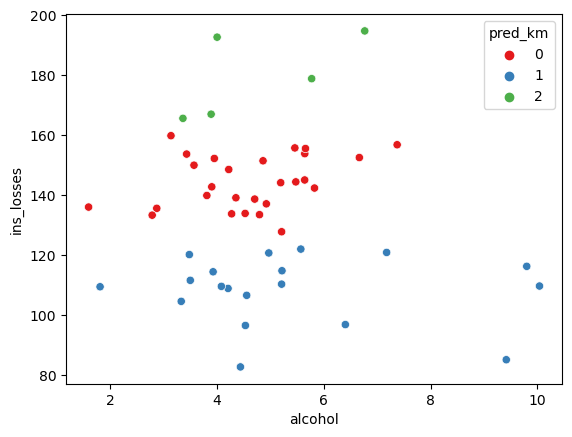

In [19]:
sns.scatterplot(x='alcohol', y='ins_losses', data=df_pred, hue='pred_km', palette='Set1')

*The model can see the non-scaled data as follows:*

In [37]:
import matplotlib.pyplot as plt

(0.0, 200.0)

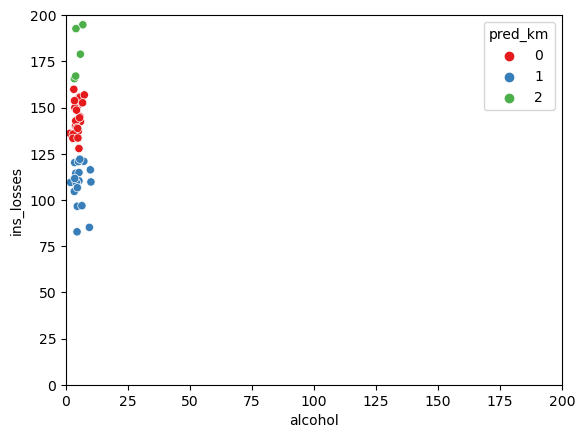

In [38]:
sns.scatterplot(x='alcohol', y='ins_losses', data=df_pred, hue='pred_km', palette='Set1')
plt.xlim(0, 200)
plt.ylim(0, 200)

*If we scale the data, the model will perform correctly*

### [ ] Model Interpretation

In [20]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/4b5d3muPQmA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### The Need for Scaling the Data

- You need to `scale` the data
- Every time the algorithm computes `distances`
- Between `different variables`
- Because it's **not the same to increase 1kg of weight than 1m of height**

## [ ] `MinMaxScaler()` the data

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [28]:
data = scaler.fit_transform(X=df_crashes) #the variable will hold a 2-D scaled data array 

In [32]:
df_scaled = pd.DataFrame(data=data, columns=df_crashes.columns, index=df_crashes.index) #the new dataframe will have same columns and index names

In [33]:
df_scaled.head()

,alcohol,ins_losses
abbrev,,
AL,0.479218,0.556369
AK,0.347188,0.456842
...,...,...
AR,0.501007,0.532357
CA,0.209236,0.739802


*See that now our data is scaled from 0 to 1*

## [ ] `KMeans()` Model with *Scaled Data*

### Fit the Model

In [40]:
from sklearn.cluster import KMeans

In [41]:
model_km = KMeans(n_clusters=3)

*Renember that we only need the X features to fit the model because we don´t know what to predict with the data, that`s why this is unsupervised learning, because we don´t have the target variable*

In [42]:
model_km.fit(X=df_scaled)

KMeans(n_clusters=3)

### Calculate Predictions

In [44]:
model_km.predict(X=df_scaled)

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0,
       1, 1, 0, 1, 0, 1, 1])

### Create a New DataFrame for the Predictions

In [45]:
df_pred["pred_km_scaled"] = model_km.predict(X=df_scaled)

In [46]:
df_pred

,alcohol,ins_losses,pred_km,pred_km_scaled
abbrev,,,,
AL,5.640,145.08,0,0
AK,4.525,133.93,0,1
...,...,...,...,...
WI,4.554,106.62,1,1
WY,5.568,122.04,1,1


### Visualize the Model

***Predictions with scaled data***

<AxesSubplot: xlabel='alcohol', ylabel='ins_losses'>

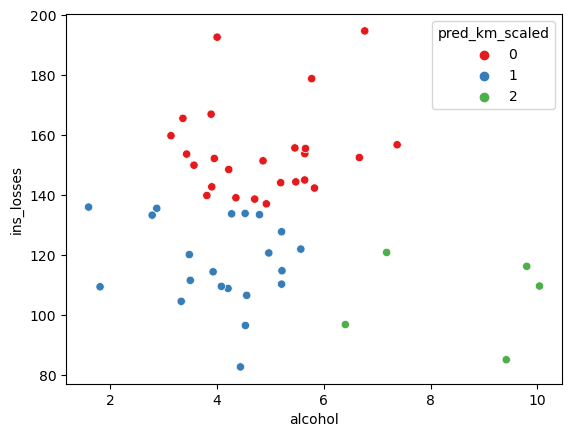

In [47]:
sns.scatterplot(x='alcohol', y='ins_losses', data=df_pred, hue='pred_km_scaled', palette='Set1')

***Predictions with (original) non-scaled data***

<AxesSubplot: xlabel='alcohol', ylabel='ins_losses'>

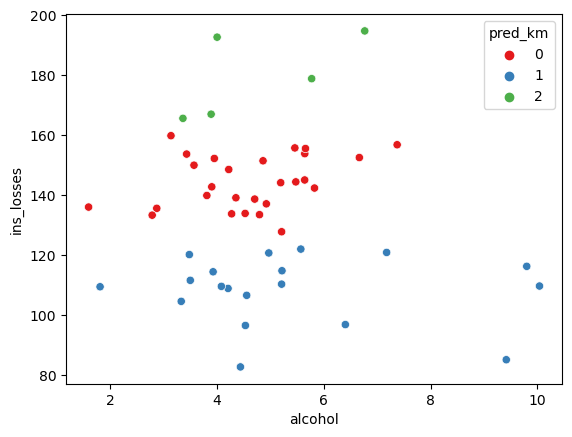

In [48]:
sns.scatterplot(x='alcohol', y='ins_losses', data=df_pred, hue='pred_km', palette='Set1')

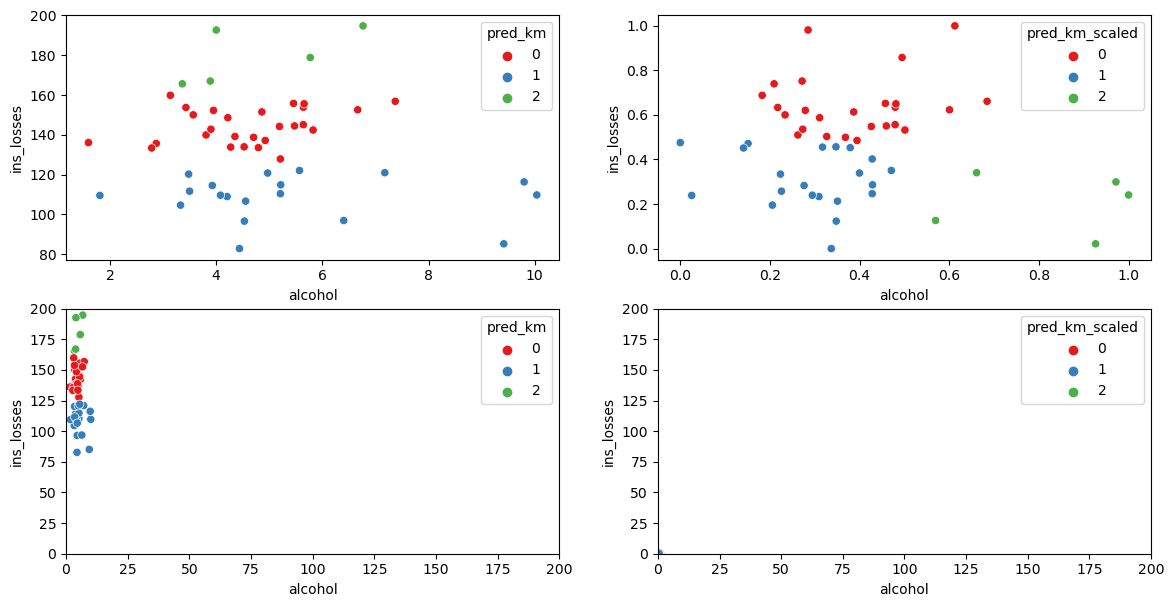

In [49]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 7))

sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_km',
                data=df_pred, palette='Set1', ax=ax1);

sns.scatterplot(x='alcohol', y='ins_losses', hue=df_pred.pred_km_scaled,
                data=df_scaled, palette='Set1', ax=ax2);

sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_km',
                data=df_pred, palette='Set1', ax=ax3);

sns.scatterplot(x='alcohol', y='ins_losses', hue=df_pred.pred_km_scaled,
                data=df_scaled, palette='Set1', ax=ax4);

ax3.set_xlim(0, 200)
ax3.set_ylim(0, 200)

ax4.set_xlim(0, 200)
ax4.set_ylim(0, 200);

*At the left side, we have the plots of the original data, watch how the alcohol wasn´t taken in account by the model, and at the right side, we can see the plots of the scaled data*

### Model Interpretation

## [ ] Other `Clustering` Models in Python

- Visit the `sklearn` website [here ↗](https://scikit-learn.org/stable/)
- **Pick 2 new models** and compute the *Clustering*

### Agglomerative Clustering

#### Fit the Model

In [50]:
from sklearn.cluster import AgglomerativeClustering

In [52]:
model_ac = AgglomerativeClustering(n_clusters=3)

In [55]:
model_ac.fit(X=df_scaled)

AgglomerativeClustering(n_clusters=3)

#### Calculate Predictions

In [56]:
model_ac.fit_predict(X=df_scaled)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1], dtype=int64)

#### Create a New Column for the Predictions

In [57]:
df_pred["pred_ac"] = model_ac.fit_predict(X=df_scaled)

In [58]:
df_pred

,alcohol,ins_losses,pred_km,pred_km_scaled,pred_ac
abbrev,,,,,
AL,5.640,145.08,0,0,0
AK,4.525,133.93,0,1,0
...,...,...,...,...,...
WI,4.554,106.62,1,1,1
WY,5.568,122.04,1,1,1


#### Visualize the Model

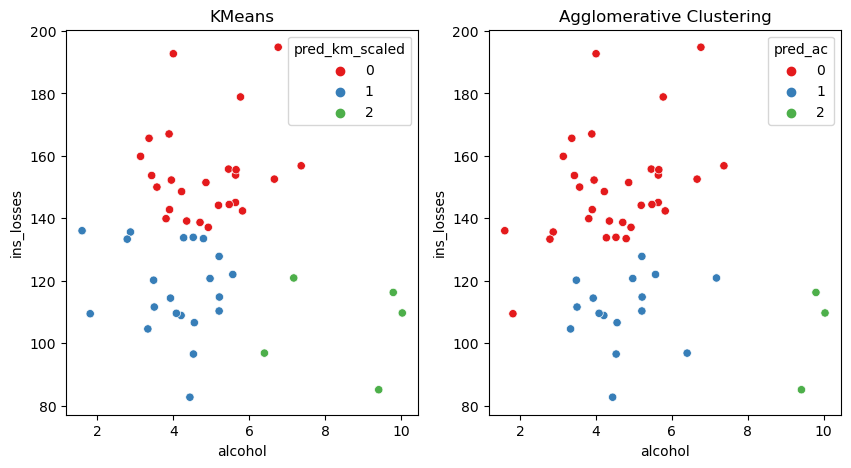

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_km_scaled',
                data=df_pred, palette='Set1', ax=ax1);

sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_ac',
                data=df_pred, palette='Set1', ax=ax2);

ax1.set_title('KMeans')
ax2.set_title('Agglomerative Clustering');

### Spectral Clustering

#### Fit the Model

In [60]:
from sklearn.cluster import SpectralClustering

In [63]:
model_sc = SpectralClustering(n_clusters=3)

In [67]:
model_sc.fit(X=df_scaled)

SpectralClustering(n_clusters=3)

#### Calculate Predictions

In [68]:
model_sc.fit_predict(X=df_scaled)

array([1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2,
       1, 2, 1, 1, 0, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 2])

#### Create a New Column for the Predictions

In [69]:
df_pred['pred_sc'] = model_sc.fit_predict(X=df_scaled)

In [70]:
df_pred

,alcohol,ins_losses,pred_km,pred_km_scaled,pred_ac,pred_sc
abbrev,,,,,,
AL,5.640,145.08,0,0,0,1
AK,4.525,133.93,0,1,0,0
...,...,...,...,...,...,...
WI,4.554,106.62,1,1,1,0
WY,5.568,122.04,1,1,1,0


#### Visualize the Model

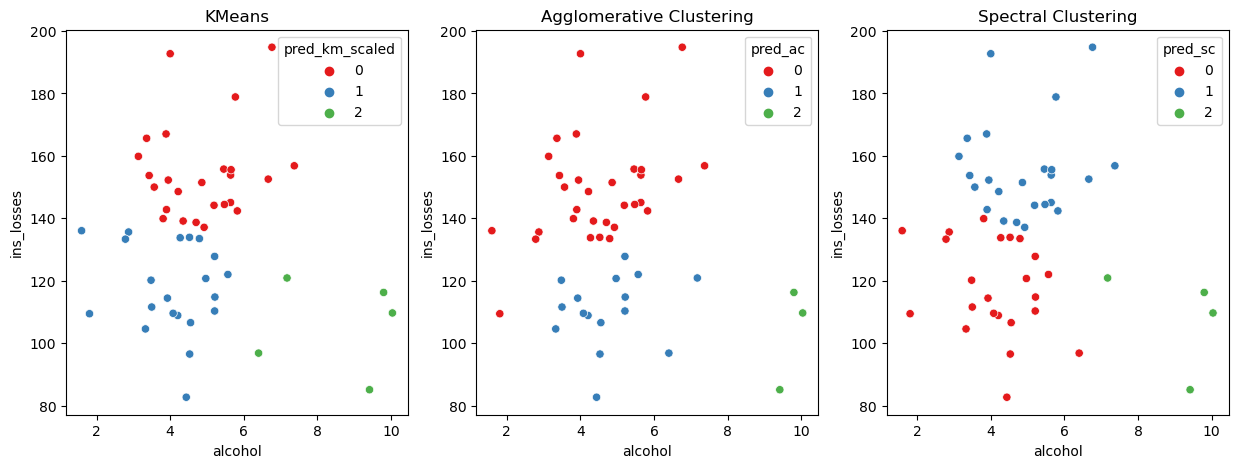

In [71]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.set_title('KMeans')
sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_km_scaled',
                data=df_pred, palette='Set1', ax=ax1);

ax2.set_title('Agglomerative Clustering')
sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_ac',
                data=df_pred, palette='Set1', ax=ax2);

ax3.set_title('Spectral Clustering')
sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_sc',
                data=df_pred, palette='Set1', ax=ax3);

## [ ] Practical Use Case Conclusion

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.